# Описание проекта

* Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
* Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
* Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
* В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  


## Ознакомление с данными.

In [1]:
#импортируем все необходимые библиотеки
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# Сохраняем датасет в переменную data и смотрим что у нас есть.
data = pd.read_csv('/datasets/games.csv', sep=',')
display(data.info())
display(data.describe())
display(data.describe(include='object'))
display(data.head())
display(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

#### Промежуточный итог.
Только открыв данные мы видим что в продажа Северной Америки и Европы довольно сильный разброс между медианным значением и средним.  

Имеются пропуски в столбцах:
* Name 
* Year_of_Release 
* Genre 
* Critic_Score
* User_Score
* Rating  

Необходимо преобразовать данные в нужный тип в столбцах: 
* Year_of_Release тип указан как object, переведём в int
* User_Score тип указан как object, переведём в float

## Подготовка данных.
Начнем с пропусков. 

In [3]:
data[data['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Зато сразу нашли и пропуски в Genre. Так как строки всего лишь 2 и нам известны  про них только год выхода и продажи, так как это скорее всего не повлияет на исследование, то удалим их.  
Интересно что нам не известны имена и жанры только этих 2 игр. Если бы был регион только Япония, можно было б предположить написание имени игры иероглифами, и на самом деле это одна игра внесенная в список дважды, но все это слишком сложно, поэтому просто удалим. 

In [4]:
data.dropna(subset=['Name'], inplace=True)

Столбцы name и genre занимают только 2 строки и притом одни и те же. С остальными столбцами чуть посложнее. Взглянем на Year_of_Release и решим что делать.

In [5]:
display(data[data['Year_of_Release'].isna()].head())
display(data[data['Year_of_Release'].isna()].describe())
display(len(data[data['Year_of_Release'].isna()])/len(data))#выясним сколько же в % пропущено

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,0.0,269.000000,269.000000,269.000000,269.000000,154.000000
mean,NaN,0.219888,0.090929,0.024907,0.032007,67.584416
std,NaN,0.424907,0.207933,0.090160,0.075546,14.828740
min,NaN,0.000000,0.000000,0.000000,0.000000,22.000000
25%,NaN,0.010000,0.000000,0.000000,0.000000,57.000000
50%,NaN,0.090000,0.020000,0.000000,0.010000,70.000000
75%,NaN,0.240000,0.100000,0.000000,0.030000,78.000000
max,NaN,4.260000,2.360000,0.770000,0.710000,94.000000


0.016095255190570215

Понятно только то что пропущенные Year_of_Release составляют 1.6% от всей массы данных. Думаю мы можем их удалить (хотя на самом деле была идея заполнить пропущенные года посмотрев просто на дату этой же игры на другой платформе, правда ничего не получилось)

In [6]:
data.dropna(subset=['Year_of_Release'], inplace=True)

Продолжим Year_of_Release и поменяем тип данных на int, а заодно и User_Score поменяем на float. Да и в целом для удобства переведем названия столбцов в нижний регистр. Ранее мы заметили в user_score значение tbd(поисковик говорит нам что это абревиатура обозначает "необходимо уточнение") заменим его на NaN, а остальное переведем 

In [37]:
data.columns = data.columns.str.lower() #приводим к нижнему регистру 
data['year_of_release'] = data['year_of_release'].astype(int) #меняем тип на int
data['user_score'] = data['user_score'].replace('tbd', np.NaN).astype('float') #во float

Посмотрим наличие явных дубликатов.

In [8]:
data.duplicated().sum()

0

Чтобы найти неявные дубликаты рассмотрим имя, платформу и год релиза, т.к. многие игры выходят с одним именем но в разные годы или на другой платформе. 

In [9]:
data.duplicated(subset=['name','platform', 'year_of_release'], keep=False).sum()

2

In [10]:
data[data.duplicated(subset=['name','platform', 'year_of_release'], keep=False)] #посмотрим на дубликаты поближе

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Да, действительно это дубль, удалим его.

In [11]:
data.drop_duplicates(subset=['name','platform', 'year_of_release']).reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16438,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16439,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16440,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16441,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Не совсем удобно оперировать продажами которые разделены по разным столбцам, создадим дополнительный, где укажем суммарные продажи.

In [12]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

У нас есть большое количество пропусков в critic_score и user_score, поставим туда заглушку, и надо запомнить это. 

In [13]:
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)

И переходим к последнему столбцу, посмотрим какие у нас есть рейтинги. И скольким играм присвоены различные рейтинги. 

In [14]:
display(data['rating'].unique())
display(data['rating'].value_counts(dropna=False))

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

NaN     6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Как и ожидалось, пропущенных значений очень много, заменим иным значением. А так же малые рейтинги присоединим к большим близким по значению.

In [15]:
data['rating'] = data['rating'].replace({'EC':'E', 'K-A':'E', 'RP':'E', 'AO':'M'})
data['rating'] = data['rating'].fillna('no rating')

А теперь посмотрим что у нас получилось

In [16]:
display(data.info())
display(data.describe())
display(data.describe(include='object'))
display(data.head())
display(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


None

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,32.979871,2.688081,0.536023
std,5.875525,0.818378,0.506716,0.311100,0.188005,36.302947,4.170124,1.558786
min,1980.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,-1.000000,-1.000000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


,name,platform,genre,rating
count,16444,16444,16444,16444
unique,11426,31,12,5
top,Need for Speed: Most Wanted,PS2,Action,no rating
freq,12,2127,3307,6676


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,no rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,no rating,31.38


name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

#### Промежуточный итог.
* Мы удалили часть пропущенных данных в столбцах name, year_release, genre, т.к. они не составляли более 1,6% данных.
* Удалили 1 неявный дубликат.
* Создали для удобства столбец с суммарными продажами.
* Поставили заглушки в critic_score, user_score, rating, т.к. иные действия будут сильно искажать данные полученные данные, т.к. пропусков в этих столбцах очень много. Возможно это связано с тем что рейтинги составляют Американские агенства, и они не везде ставят свой рейтинг.
* В столбце user_score имеются отметки tbd, поисковики выводят результат с тем что это обозначает "Будет объявлено дополнительно" или "Будет объявлено после уточнений", т.к. фактически для нас это обозначает отсутствие сведений, мы поступили с ним как с NaN, т.е. поставили заглушки.
* Немного переделали систему рейтинга. 
* Поменяли тип данных в столбцах year_of_release и user_score


## Исследовательский анализ данных
### Cколько игр выпускалось в разные годы.

In [17]:
display(data['year_of_release'].value_counts())

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

Не хватает наглядности, построим график.

Text(0, 0.5, 'Выпуск')

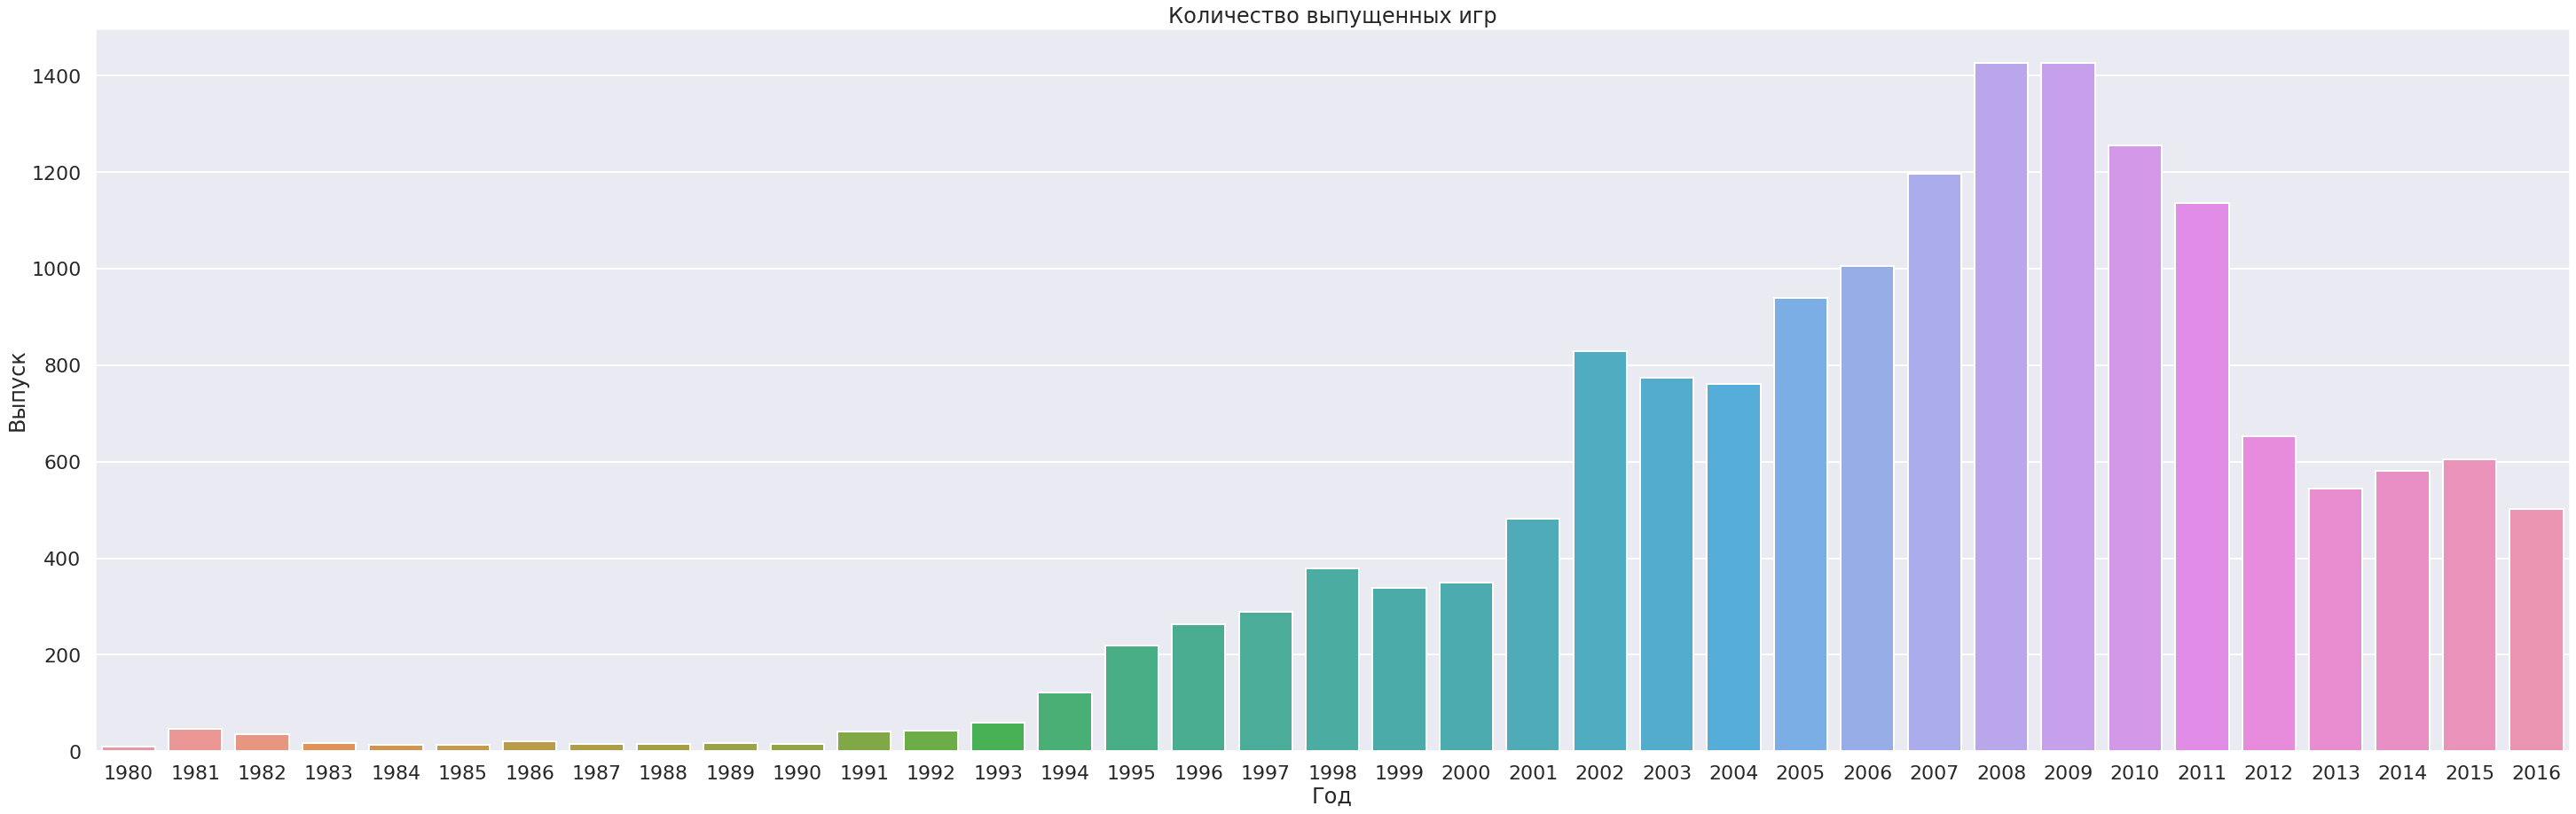

In [18]:
sns.set(style='darkgrid', context= 'poster')
plt.figure(figsize=(50, 15))
sns.countplot(x = data['year_of_release'])
plt.title('Количество выпущенных игр')
plt.xlabel('Год')
plt.ylabel('Выпуск')

Но тут мы видим абсолютное количество игр по годам, т.к. одни и те же игры выходили на разных платформах. Попробуем построить более объективный график убрав "дубликаты". Для этого создадим нвоый датафрейм, чтобы не менять старый, он ведь все еще нам нужен и заново построим график.

6582

2008    1039
2009    1001
2010     900
2007     884
2011     779
2006     773
2005     657
2002     631
2004     550
2003     546
2012     446
2001     428
1998     364
2015     362
2013     335
1999     326
2000     325
2014     319
2016     297
1997     282
1996     258
1995     215
1994     117
1993      59
1981      46
1992      41
1991      40
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

Text(0, 0.5, 'Выпуск')

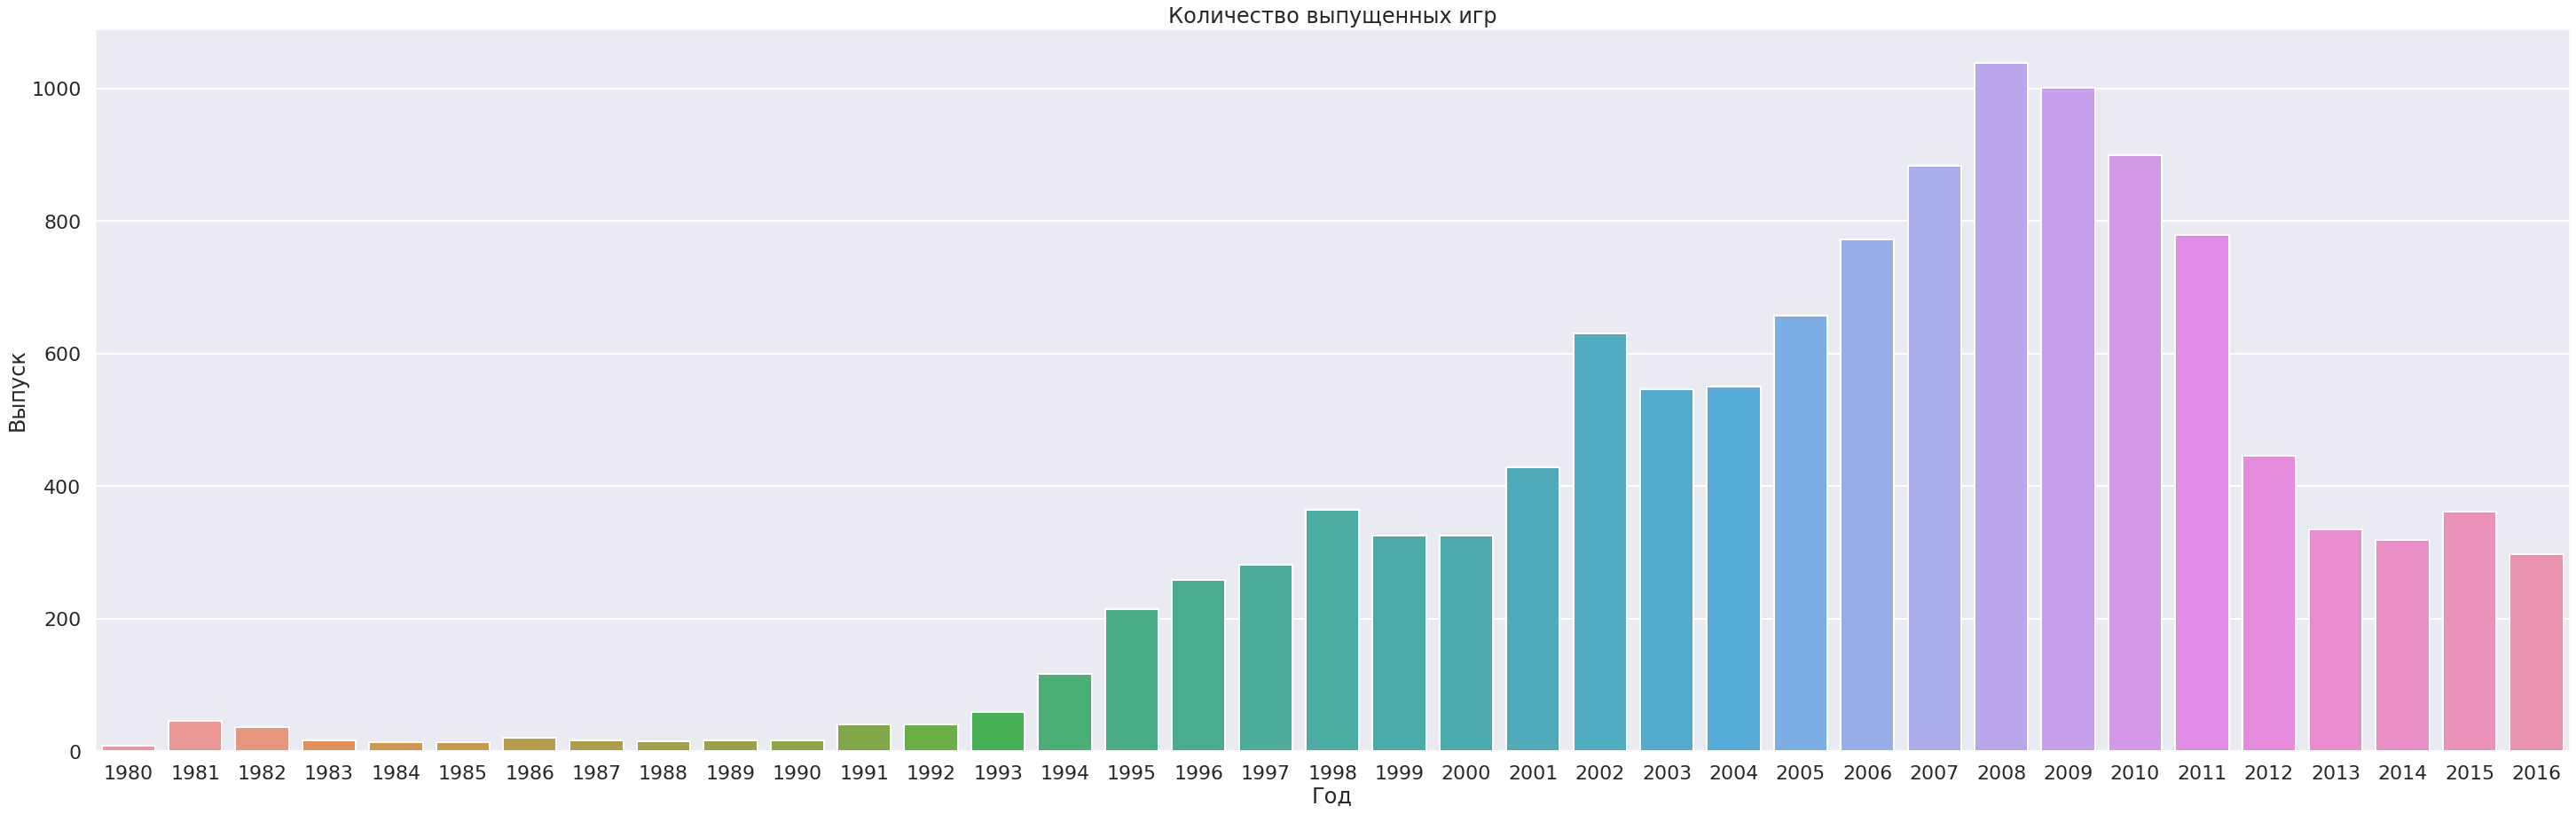

In [19]:
display(data.duplicated(subset=['name', 'year_of_release'], keep=False).sum()) #узнаем сколько таких дубликатов 
chart_data=data.drop_duplicates(subset=['name', 'year_of_release']).reset_index(drop=True)
display(chart_data['year_of_release'].value_counts())

sns.set(style='darkgrid', context= 'poster')
plt.figure(figsize=(50, 15))
sns.countplot(x = chart_data['year_of_release'])
plt.title('Количество выпущенных игр')
plt.xlabel('Год')
plt.ylabel('Выпуск')

In [20]:
#рост количества игр идет до 2008 года, и тут мне стало кое что интересно.
chart_data['platform'].unique() 

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'WiiU', 'GC',
       'GEN', 'XOne', 'DC', 'SAT', 'PSV', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

#### Промежуточный итог.
Рисунок графика как будто не поменялся, но сильно изменились количественные показатели. Да и некоторые года просели сильнее чем другие. Такие показатели более объективны.  
И по ним мы видим что с середины 90-х годов начинается рост количества выхода игр, это можно объяснить ростом вычислительных мощностей приставок/консолей и персональных компьютеров(ПК). Наибольшее количество игр было выпущено в 2008 году, а в дальнейшем идет спад. Но спад идет только в наблюдаемых нами платформах. С 2008 года появляются смартфоны, без которых сейчас трудно представить современного человека. Предпологаю что именно из-за смещением внимания к мобильным платформам можно объяснить снижение количества выпускаемых игр на ПК и приставках/консолях.  
Но всё же, с 2013 года наблюдается стабилизация, это важно.

### Продажи по платформам.
Сразу построим график по платформам.

Text(0, 0.5, 'Продано')

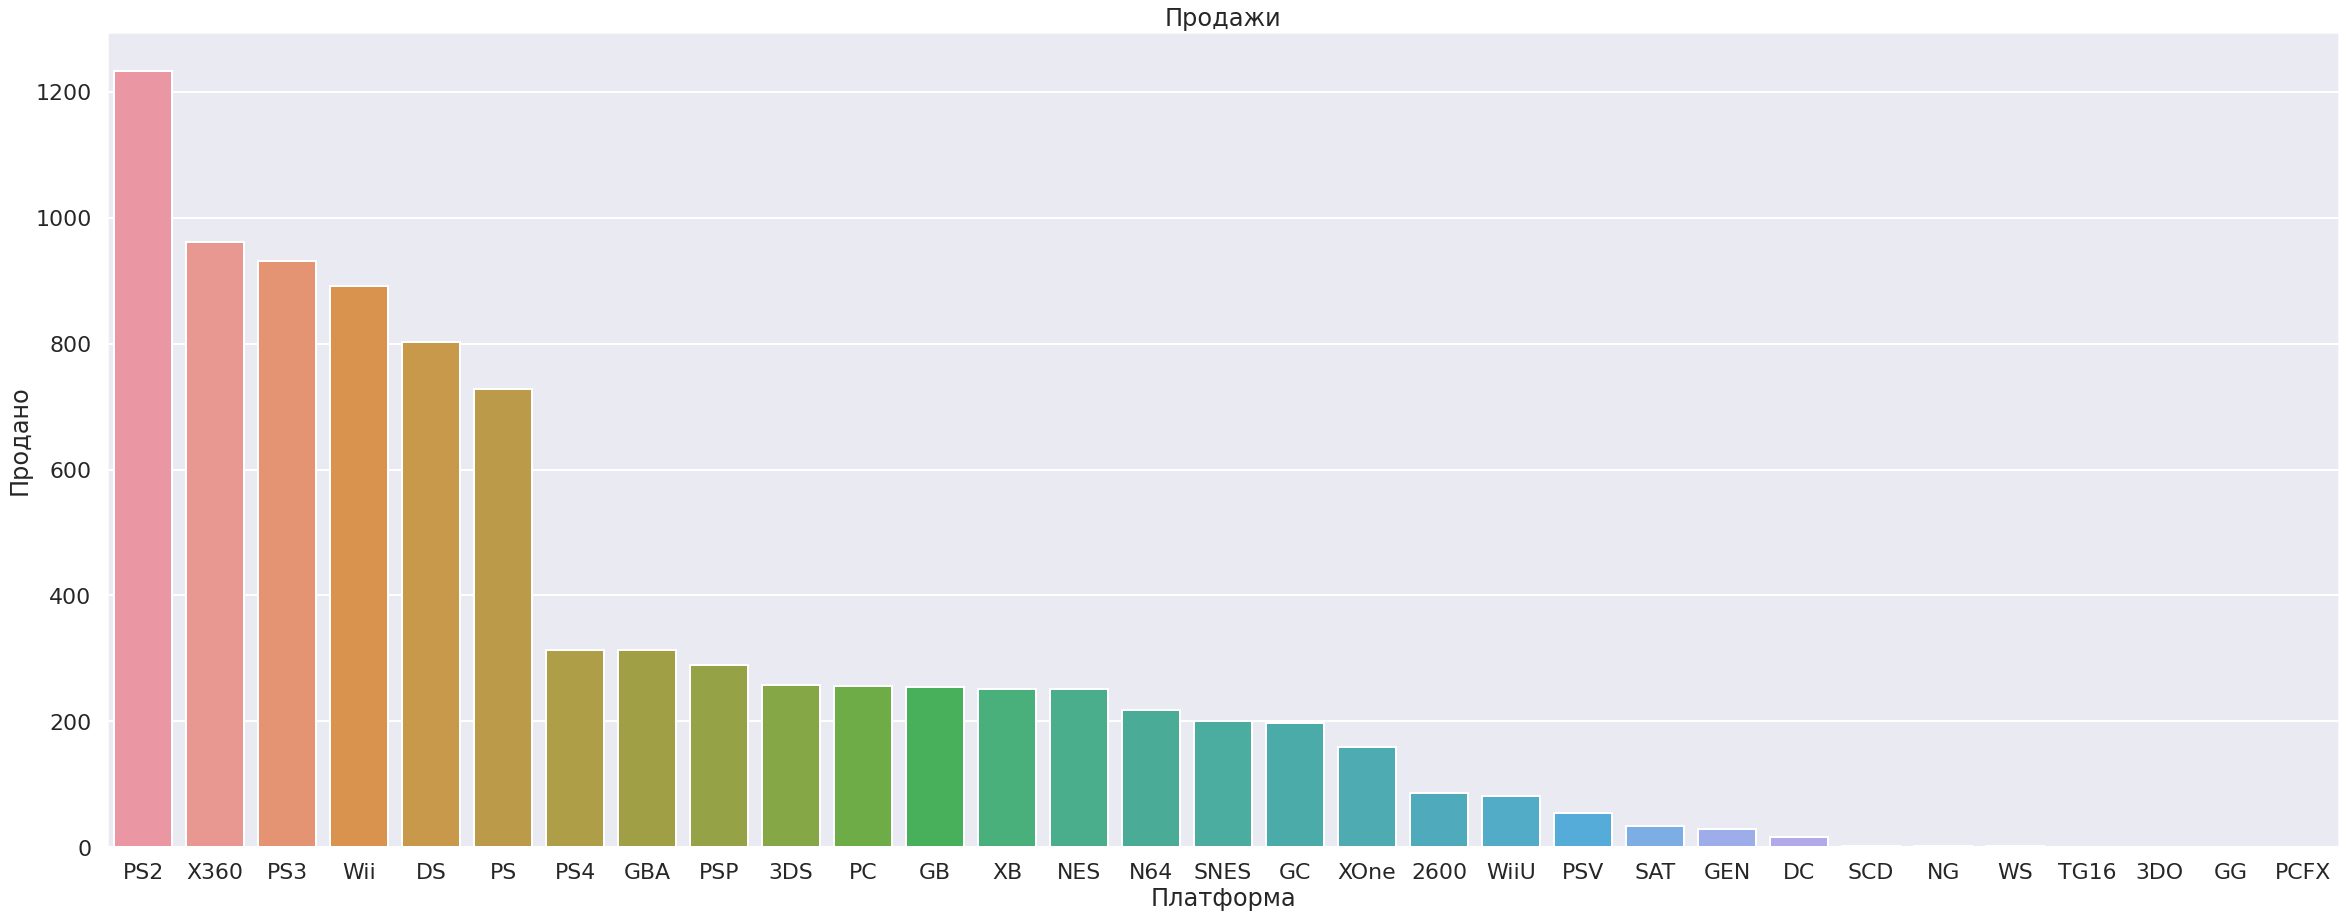

In [21]:
sns.set(style='darkgrid', context= 'poster')
plt.figure(figsize=(40, 15))
platform_data = data.pivot_table(index = 'platform',values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
sns.barplot(x = platform_data.index, y = platform_data['total_sales'])
plt.title('Продажи')
plt.xlabel('Платформа')
plt.ylabel('Продано')

6 платформ значительно впереди по продажам, а именно PS2, X360, PS3, Wii, DS, PS. Рассмотрим продажи по каждой из них.

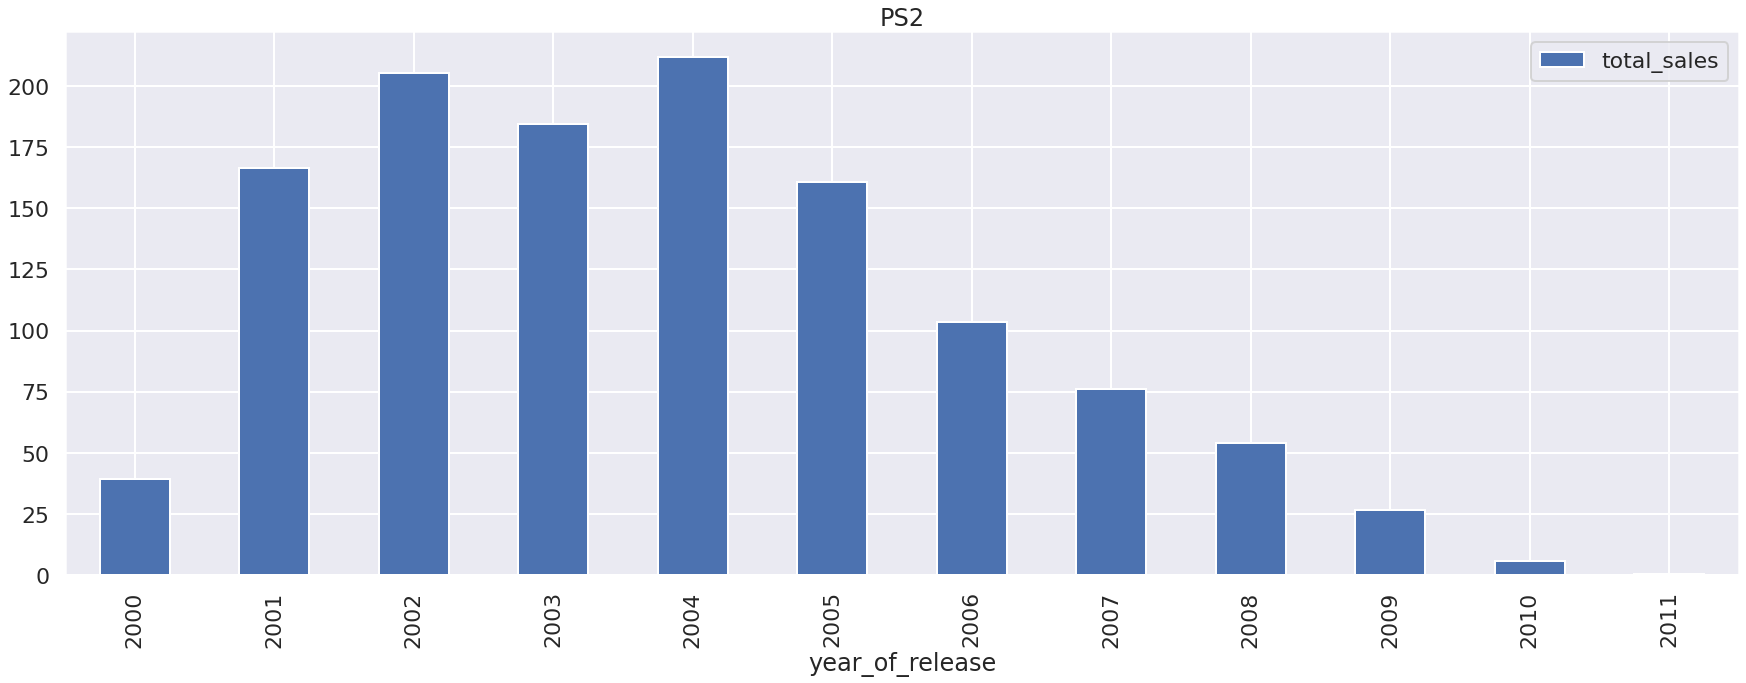

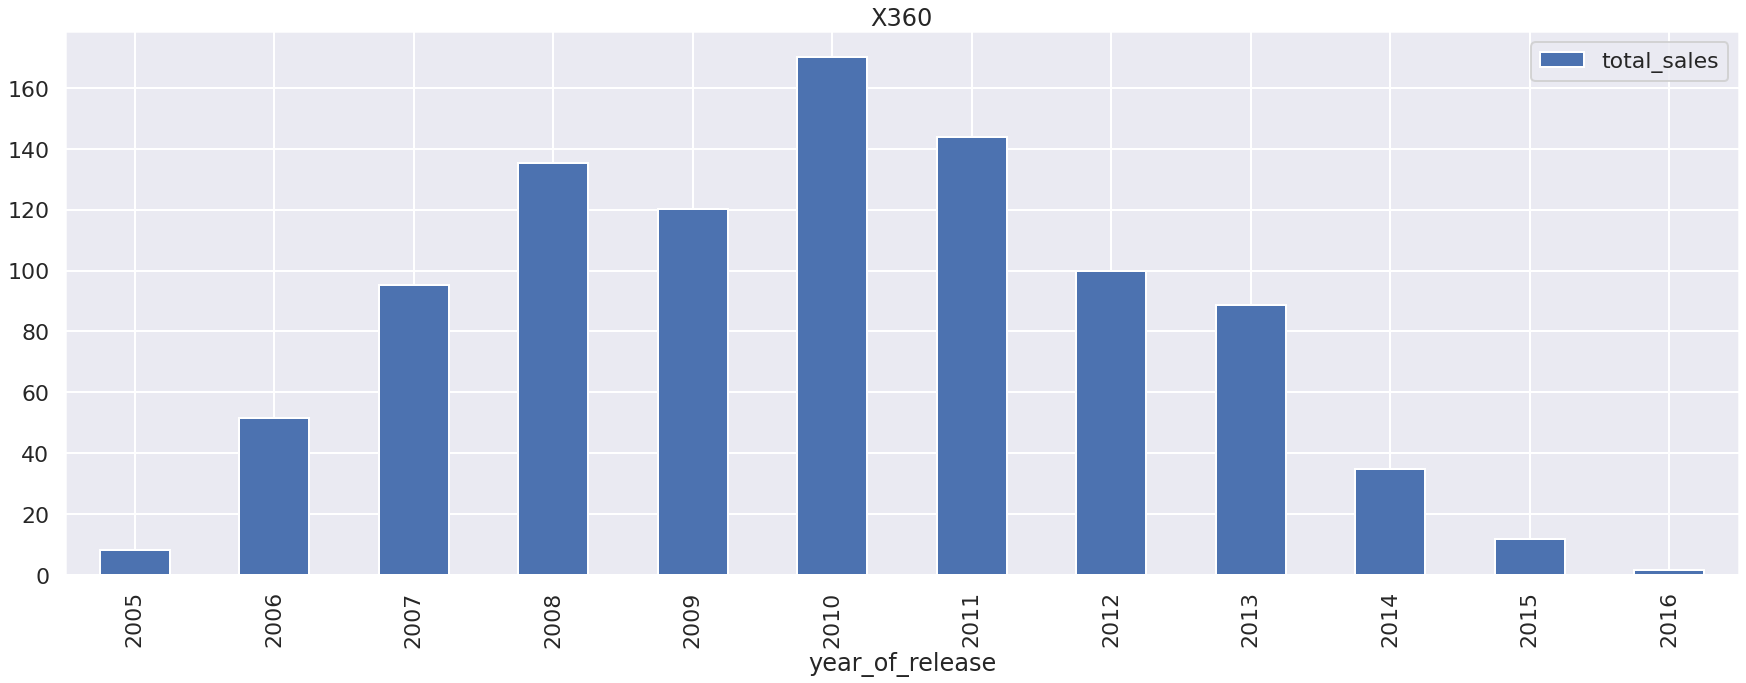

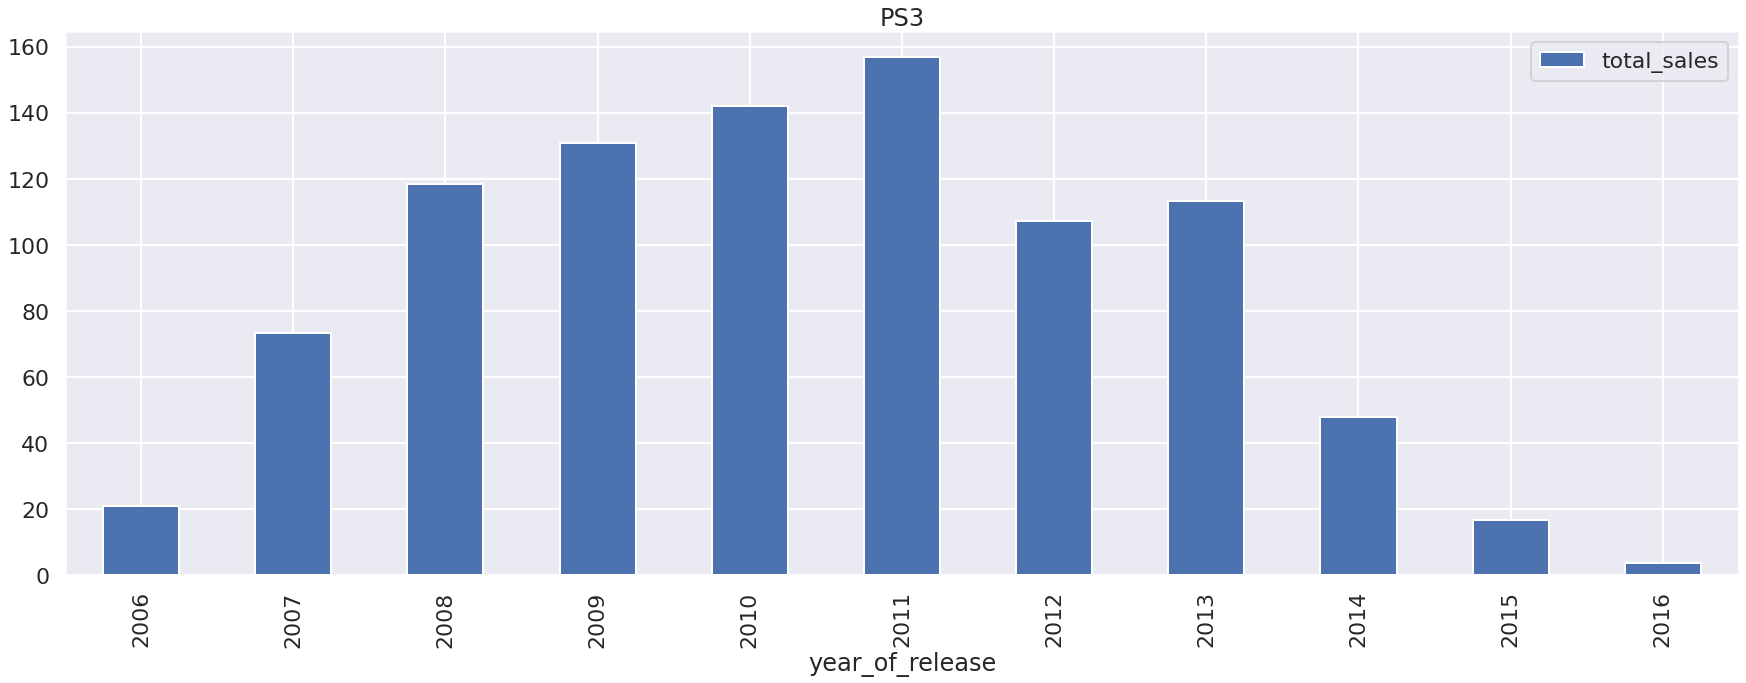

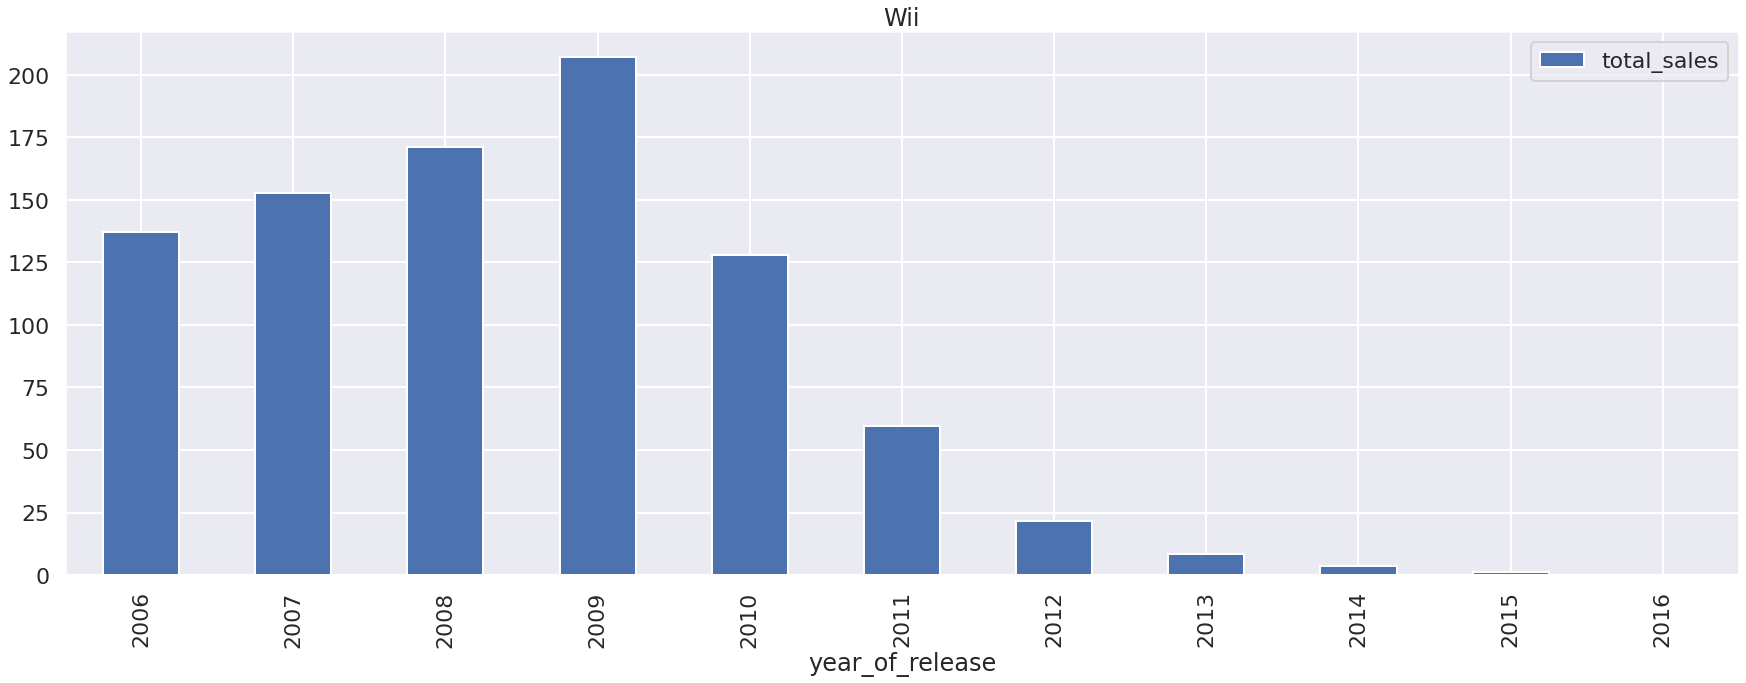

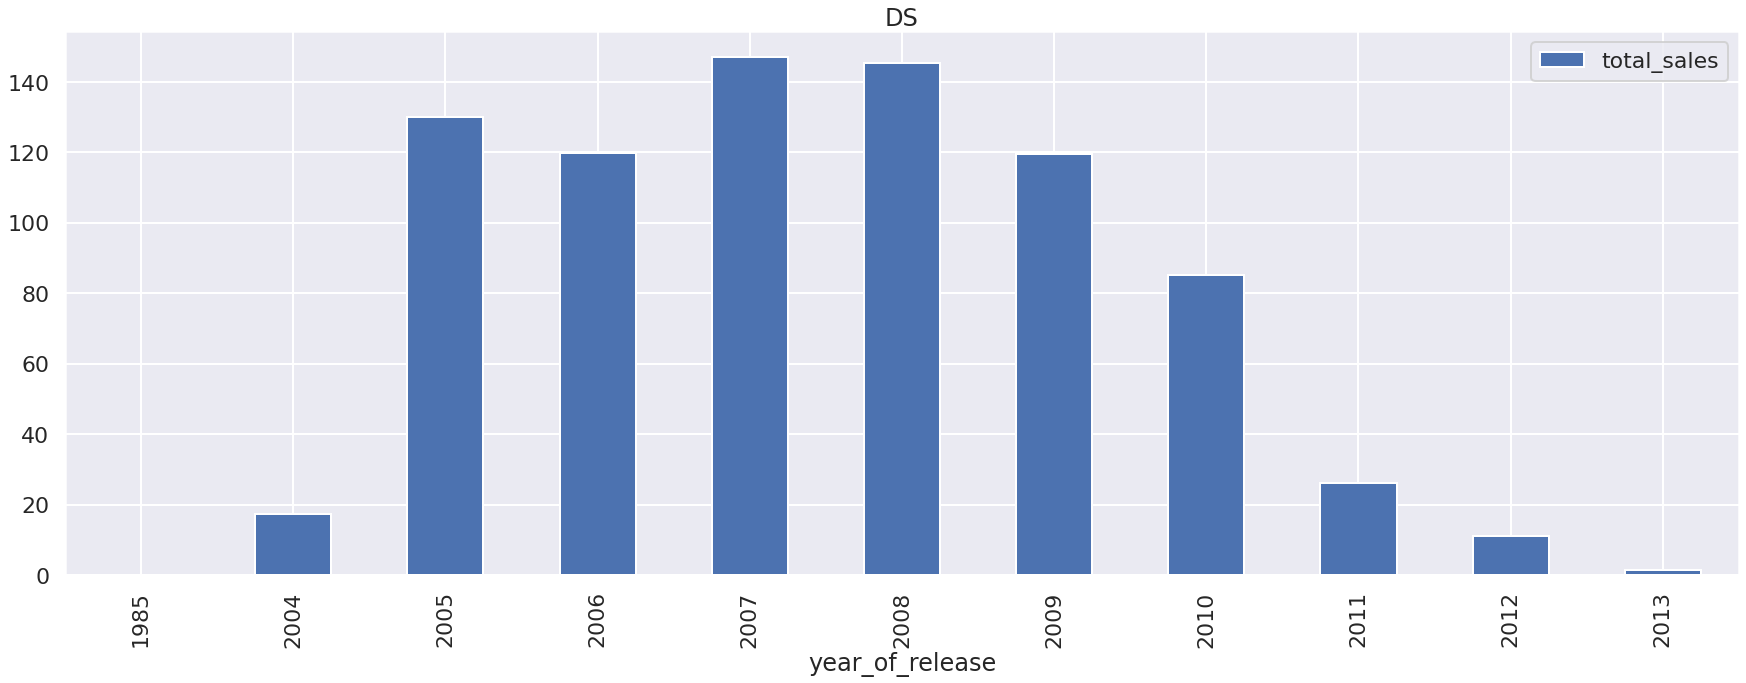

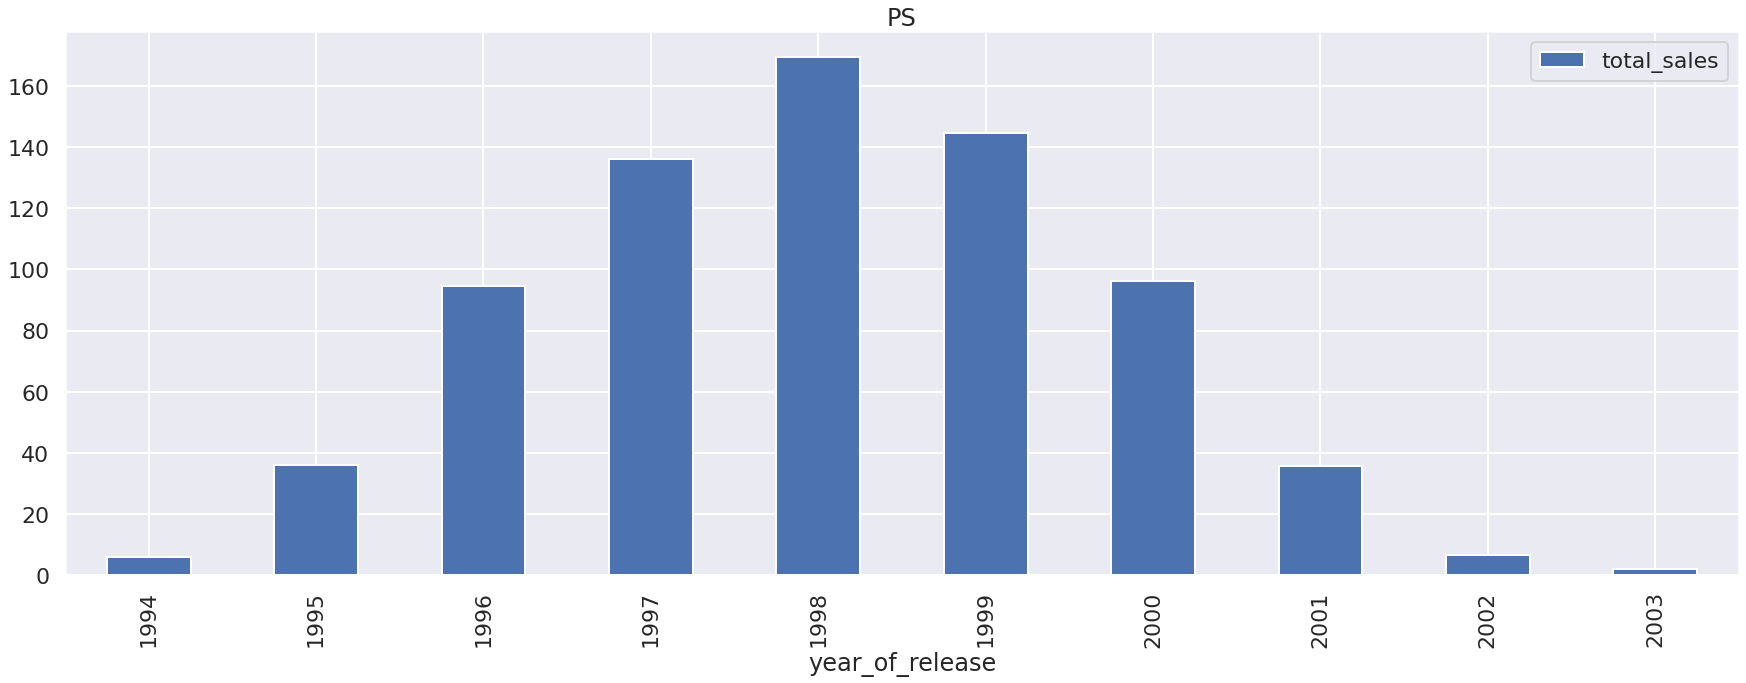

In [22]:
for platform in (platform_data.head(6).reset_index())['platform'].unique():
    data[data['platform'] == platform].pivot_table(index = 'year_of_release', 
                                                 values = 'total_sales', 
                                                 aggfunc = 'sum').plot(kind = 'bar', figsize = (30,10))

    plt.title(platform)

#### Промежуточный итог.
Мы выяснили 6 платформ лидеров по продажам игр. Все входящие в первую 6-ку платформ, уже пережили свой пик продаж игр. Каждая из них приходила к пику продаж игр примерно в течении 4-5 лет, и за такой же период идет спад. 

### Актуальный период.
Как мы вяснили до этого, стабилизация выпуска игр началось с 2013 года, а игровые платформы живут где то 8 лет, но к пику обычно приходят в течении 4 лет. Поэтому началом актуального периода, для расчета на 2017 год, будем брать 2013 год.

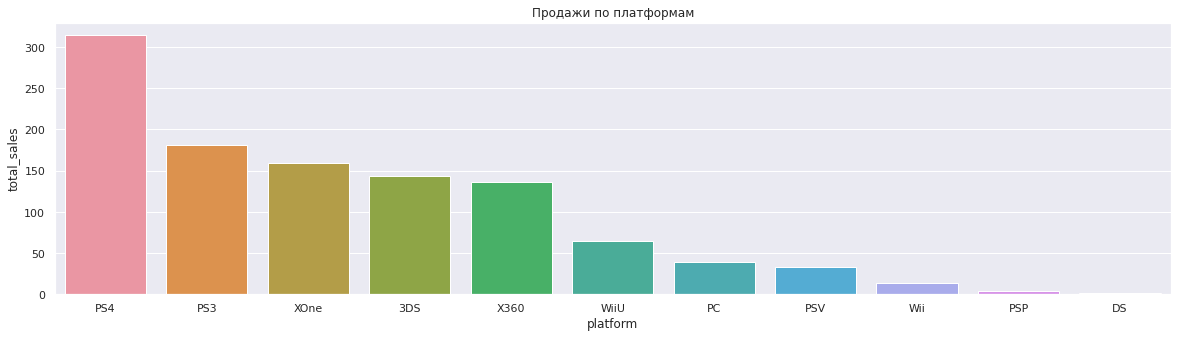

In [23]:
actual_data=data.query('year_of_release >= 2013')
actual_sales_data = actual_data.pivot_table(index = ['platform'], 
                                                values = 'total_sales', 
                                                aggfunc = 'sum').reset_index().sort_values(by = 'total_sales',
                                                                                           ascending = False)

plt.figure(figsize=(20, 5))
sns.set(style="darkgrid")
sns.barplot(x = actual_sales_data['platform'], y = actual_sales_data['total_sales']).set(title = 'Продажи по платформам');

In [24]:
actual_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').nlargest(10, 'total_sales')

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


Разобьем по годам. Т.к. года всего будет 4, построим barh.

Text(0, 0.5, 'Платформа')

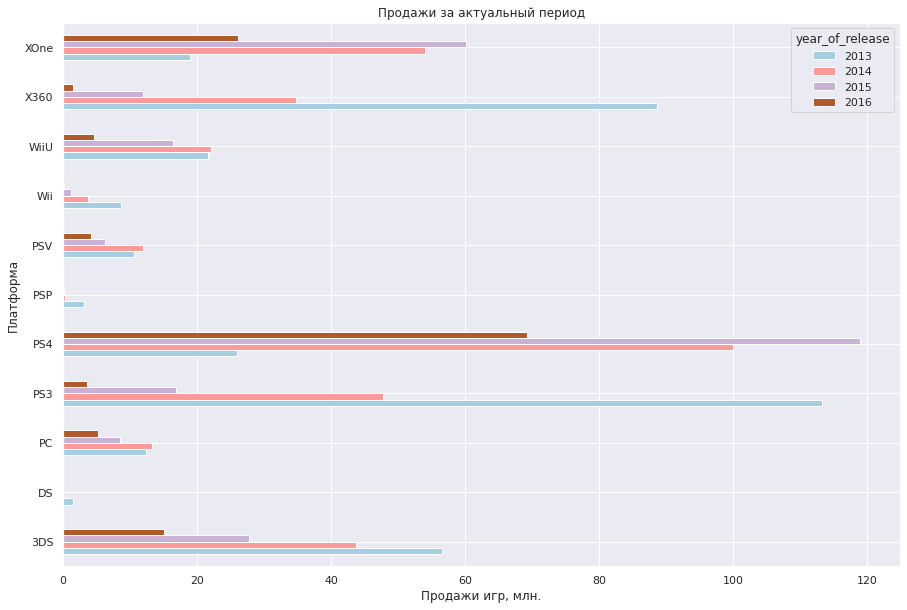

In [25]:
actual_data_barh = actual_data.pivot_table(index = ['platform'], columns = 'year_of_release', 
                                                values = 'total_sales', 
                                                aggfunc = 'sum')
actual_data_barh.plot(kind='barh', grid=True, figsize=(15,10), colormap='Paired')
plt.title('Продажи за актуальный период')
plt.xlabel('Продажи игр, млн.')
plt.ylabel('Платформа')

Text(0.5, 1.0, 'продажи за актуальный период, млн.')

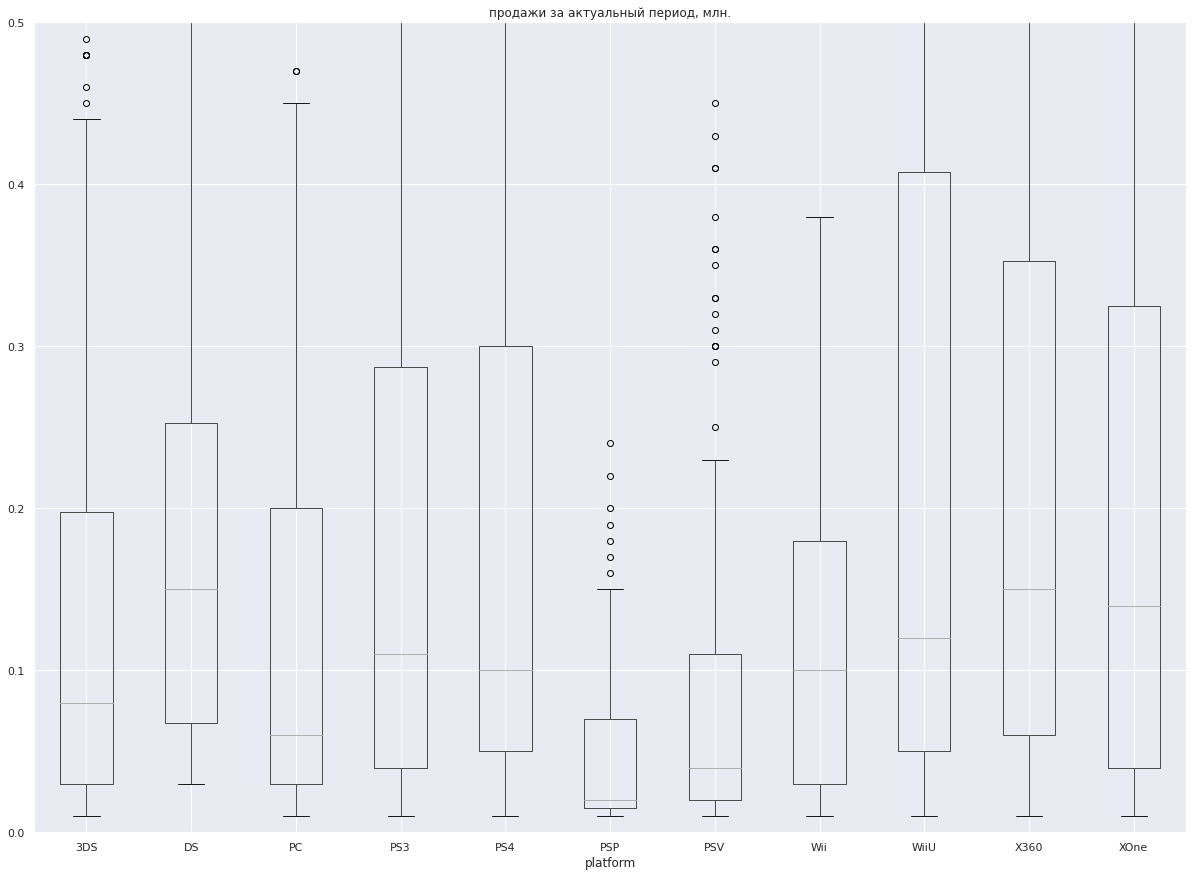

In [43]:
actual_data.boxplot(column='total_sales', by='platform', figsize=(20,15), patch_artist=False)
plt.suptitle('')
plt.ylim(0, 0.5)
plt.title('продажи за актуальный период, млн.')

#### Промежуточный итог.
Самые крупные продажи за 2016 год показывают PS4 и XOne и только у них показатели за 2016 превосходят хотя бы один из показателей предыдущих годов, а также у обоих платформ показатели продаж за 2015 являются крупнейшими. Скорее всего за ними и будут наблюдатся наибольшие продажи в будущем. 
Остальные же лидеры актуального периода, а именно X360 и PS3 являются предшественниками вышеупомянутых платформ. У 3ds же наблюдается спад.

### Влияние отзывов пользователей и критиков на продажи игр PS4
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами


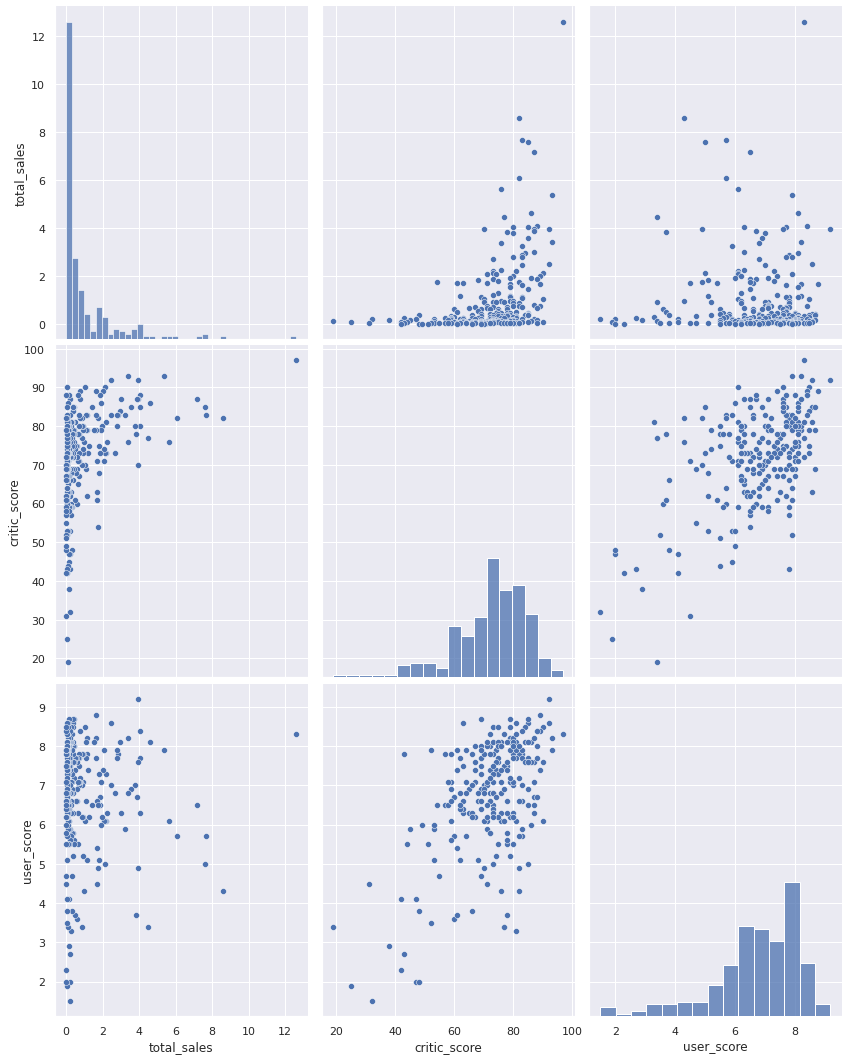

In [27]:
ps4 = actual_data.query('platform == "PS4"')
ps4 = ps4[ps4['critic_score'] != -1]
ps4 = ps4[ps4['user_score'] != -1]

sns.pairplot(ps4[['total_sales', 'critic_score', 'user_score']], height=5, aspect=0.8)

In [28]:
print(ps4[(ps4['critic_score'] != -1) 
                        & (ps4['user_score'] != -1)]
                       [['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])

critic_score    0.405895
user_score     -0.033625
total_sales     1.000000
Name: total_sales, dtype: float64


#### Промежуточный итог.
Выше мы наблюдаем некоторую корреляцию между оценками критиков и продажами игр, но между оценками пользователей и продажами игр корреляции фактически не наблюдается.

Рассмотрим то же самое на других платформах, но уже без матрицы.


PS3:
Коэффициент корреляции user_score и total_sales: 0.018588898717906952
Коэффициент корреляции critic_score и total_sales: 0.33380663565061736

XOne:
Коэффициент корреляции user_score и total_sales: -0.1069648304783788
Коэффициент корреляции critic_score и total_sales: 0.41042203561296375

3DS:
Коэффициент корреляции user_score и total_sales: 0.2699610447802225
Коэффициент корреляции critic_score и total_sales: 0.3392349287853147

X360:
Коэффициент корреляции user_score и total_sales: 0.011494107133849935
Коэффициент корреляции critic_score и total_sales: 0.3503445460228664

WiiU:
Коэффициент корреляции user_score и total_sales: 0.39275863284663015
Коэффициент корреляции critic_score и total_sales: 0.37950449899784144

PC:
Коэффициент корреляции user_score и total_sales: -0.10406065283074364
Коэффициент корреляции critic_score и total_sales: 0.19412407903472956


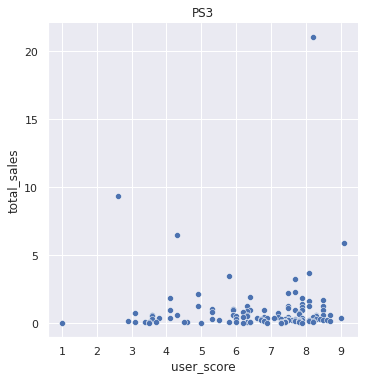

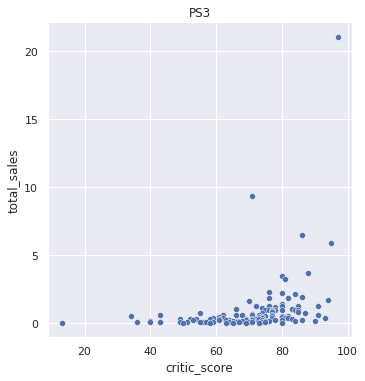

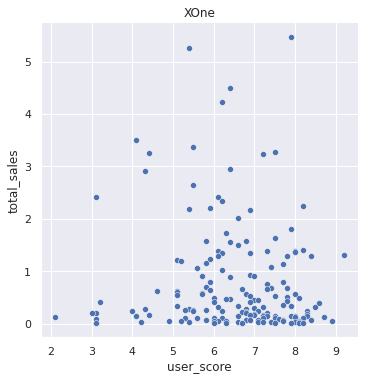

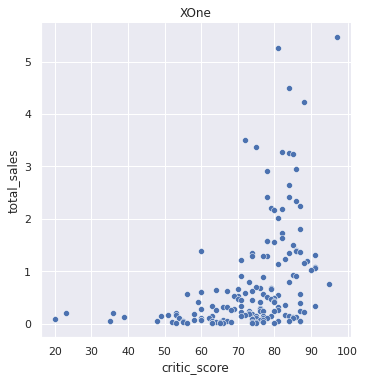

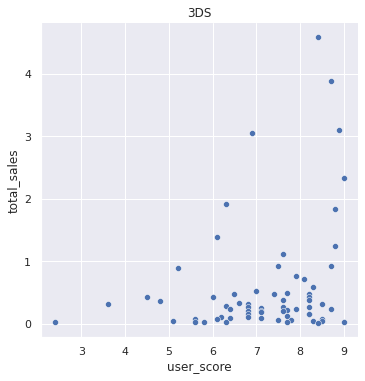

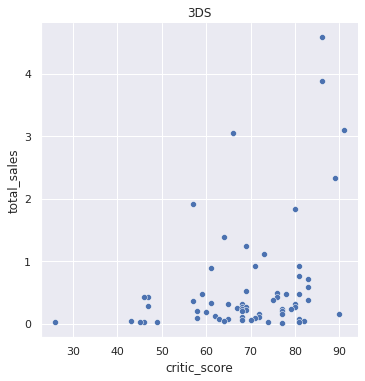

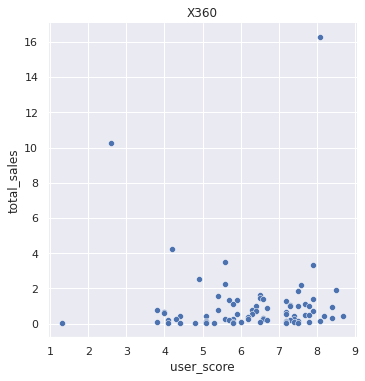

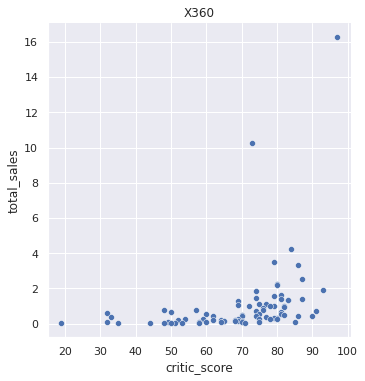

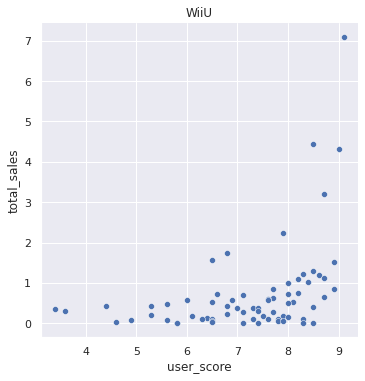

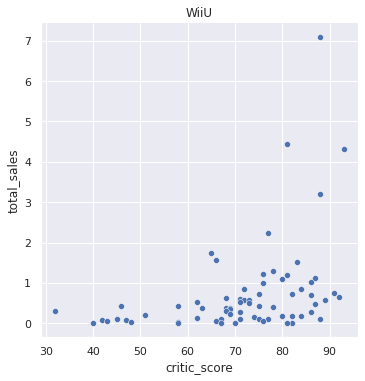

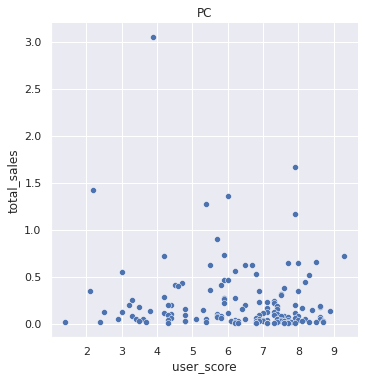

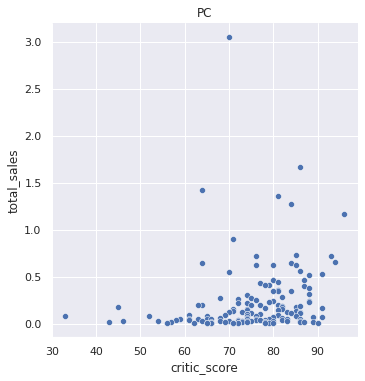

In [29]:
for platform in ['PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC']:
    print('\n{0}:'.format(platform))
    for column in ['user_score', 'critic_score']:
        temp = actual_data.query('platform == @platform and user_score >= 0 and critic_score >= 0')
        print('Коэффициент корреляции {0} и total_sales: {1}'.\
              format(column, round(temp[column]).corr(temp['total_sales']), 2))
        sns.relplot(x=column, y='total_sales', data=temp)
        _ = plt.title(platform)

#### Промежуточный итог.
Здесь так же как и ранее наблюдается некоторая корреляция оценок критиков и продаж, но в корреляция между оценками пользователей и продаж, в большинстве платформ, всё еще слабая.

### Общее распределение игр по жанрам

,genre,total_sales
0,Shooter,0.450
1,Sports,0.240
2,Platform,0.225
3,Role-Playing,0.125
4,Fighting,0.125
5,Racing,0.120
6,Action,0.110
7,Simulation,0.100
8,Misc,0.100
9,Strategy,0.080


Text(0, 0.5, 'Продажи')

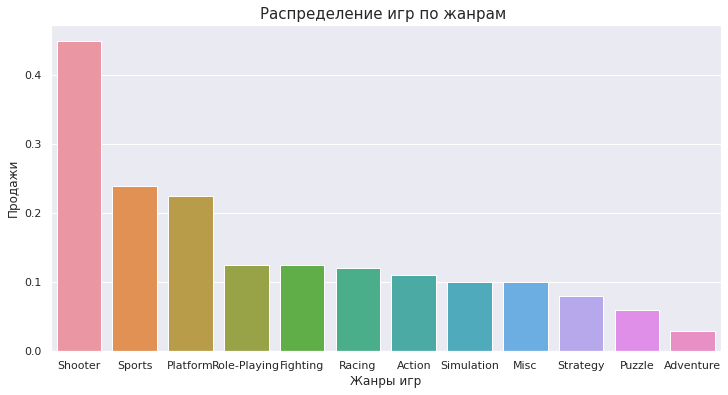

In [44]:
distr_genre = actual_data.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(
    by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)
display(distr_genre)
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=distr_genre, x='genre', y='total_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

### Итог исследовательского анализа.
Мы определили что по мере роста вычислительных технологий, пик выхода игр приходится на 2008 год (1039 игр на разных платформах), а потом пошел резкий спад до 2013 года(335 игр). 
Наиболее популярными платформами выхода игр являются PS4 (314.14), PS3(181.43), XOne(159.32), 3DS(143.25), X360	(136.80), но PS3 и X360 являются представителями старого поколения игровых платформ, их пик продаж уже позади.
Также мы выяснили что оценка критиков немного коррелируются с продажами, а оценки пользователей нет.
Самыми доходными жанрами игр являются Shooter, Sports, PLatform и они довольно сильно выделяются, возможно потому что среди Shooter'ов чаще всего выходят высокобюджетные игры(ААА) хиты, а Sports и Platform имеют свою сильную фанатскую базу, но это всего лишь предположение. Наименее же доходным в рассматриваемых платформах выглядит, что лично меня очень удивило, Adventure.

## Портрет пользователя каждого региона.

Определим для пользователя каждого региона (NA, EU, JP):

- самые популярные платформы (топ-5), опишем различия в долях продаж;
- самые популярные жанры (топ-5), поясним разницу;
- определим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [31]:
#сделаем функцию для построения графика
def top_in_regions_plot(groupby, region_sales, ax):
    pivot = actual_data.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'Северная Америка', 'eu_sales': 'Европа', 'jp_sales': 'Япония'}
    color_dict = {'na_sales': 'blue', 'eu_sales': 'gray', 'jp_sales': 'green'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=18, color=color_dict[region_sales], rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

### Топ - 5 платформ по регионам.

'Cамые популярные платформы'

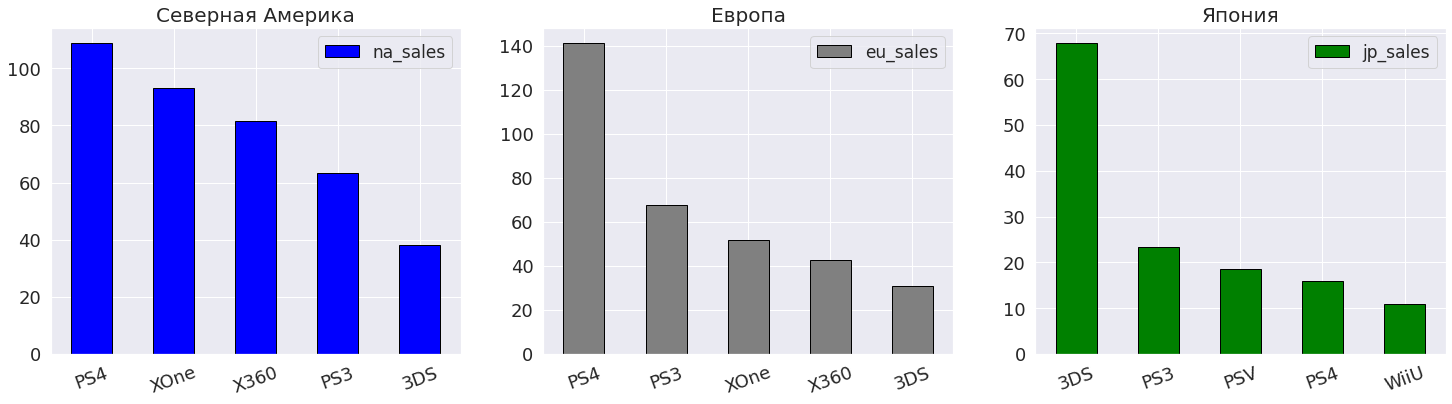

In [32]:
display('Cамые популярные платформы')
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('platform', 'na_sales', 0)
top_in_regions_plot('platform', 'eu_sales', 1)
top_in_regions_plot('platform', 'jp_sales', 2)

В Северной Америке уже самые популярные платформы это PS4 и XOne, а далее идут их предшественники, в Европе же явный лидер PS4, а XOne все ещё уступает PS3, хотя лидеры одни и те же, их порядок разный. 
В Японии же с большим отрывом лидеров является 3DS, PS4 только на 4 месте, а XOne нету в первой пятерке. 
Теперь посмотрим отличаются ли жанровые предпочтения по регионам.

### Топ - 5 жанров по регионам.

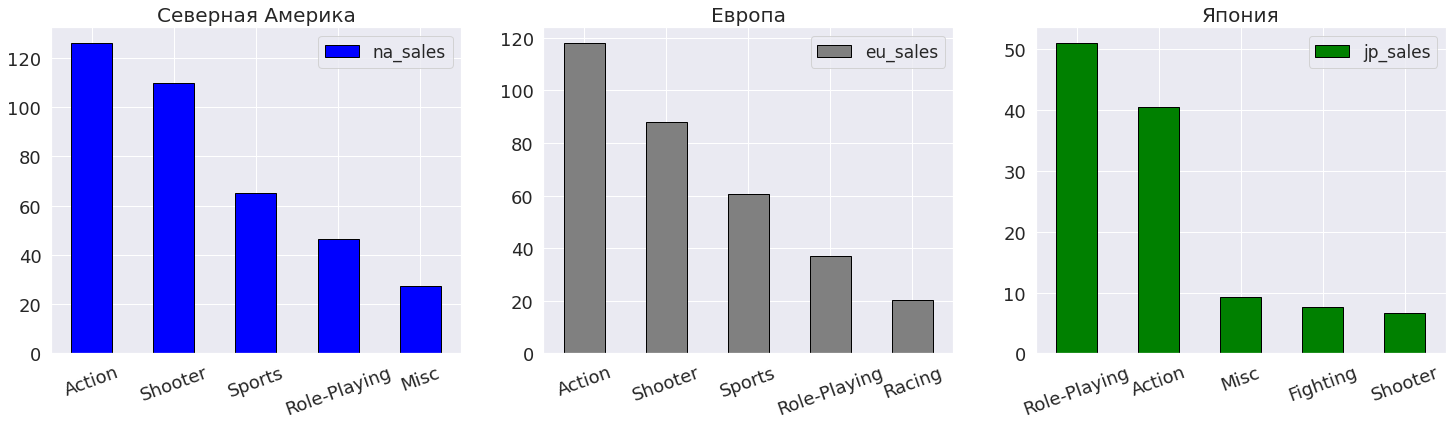

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('genre', 'na_sales', 0)
top_in_regions_plot('genre', 'eu_sales', 1)
top_in_regions_plot('genre', 'jp_sales', 2)

Предпочтения Северной Америки и Европы почти полностью совпали, так первая 4-ка жанров (Action, Shooter, Sports, Role-Playing) полностью одинаковые. Японские же предпочтения несколько иные, и сильно выделились 2 жанра, Action хоть и на второй позиции и Role-Playing занявший первое место.

### ~~Топ - 5 рейтингов ~~Влияние рейтингов на продажи игр. 

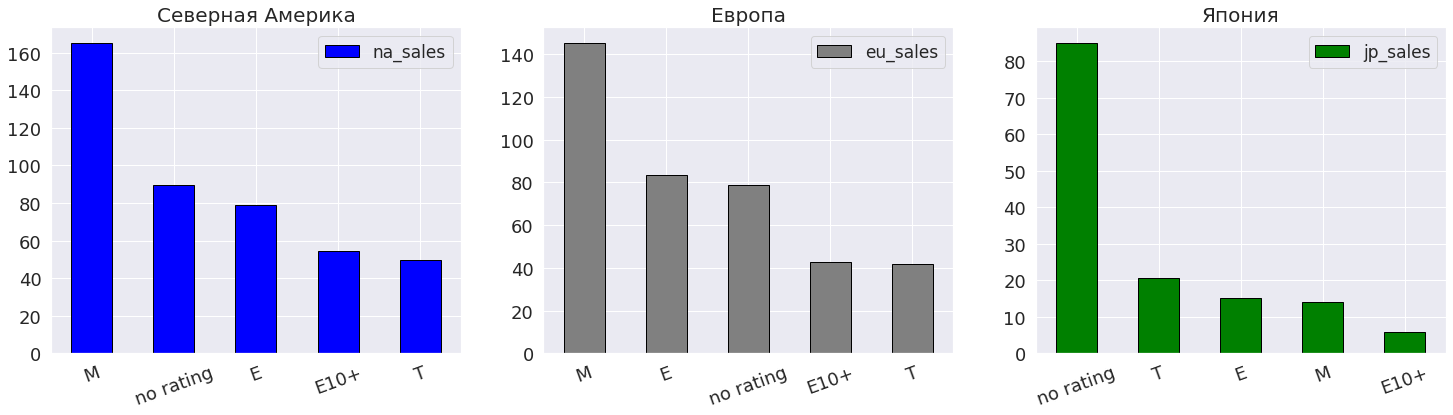

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('rating', 'na_sales', 0)
top_in_regions_plot('rating', 'eu_sales', 1)
top_in_regions_plot('rating', 'jp_sales', 2)

Для Северной Америки и Европы наибольшей популярностью пользуются игры 17+, для взрослых и старших подростков. В Японии первое место занимают подростковые игры.  
Наверно здесь стоит еще раз сказать про рейтинги, т.к. на этих графиках мы хорошо видим что наибольшее количество "no rating", которая является заглушкой для пропущенных значений, попала на Японию, говорит нам о том что возможно действительно, пропуски связаны изза того что их выставляет Американское агенство, которые не промаркировали их. 

### Итоговый портрет пользователя каждого региона.
Итак мы видим что за актуальный период в целом Европейские и Североамериканские пользователи похожи, но конечно имеются и отличия. А вот Японские пользователи довольно сильно отличаются.
Европейский и Североамериканские пользователи предпочитают PlayStation и Xbox разных моделей и при этом играют почти в одних и тех же жанрах (Action, Shooter, Sports, Role-Playing) и рейтинг игр у наиболее покупаемых игр 17+, для взрослых и старших подростков.
Японские же пользователи предпочитают портативную консоль 3DS с RPG и Action с играмидля подростков.

## Проверка гипотез.
### Гипотеза № 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Нулевая гипотеза (Н₀) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза (H₁) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [48]:
xone = actual_data.query('platform == "XOne" and user_score != -1')['user_score']
pc = actual_data.query('platform == "PC"and user_score != -1')['user_score']

alpha = .05

results = st.ttest_ind(
    xone, 
    pc, 
    equal_var=False)

print('p-значение:', results.pvalue.round(2))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.15
Не получилось отвергнуть нулевую гипотезу


#### Итог.
У нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются.

### Гипотеза № 2. Cредние пользовательские рейтинги жанров Action и Sports разные.
Нулевая гипотеза (Н₀) - средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза (H₁) - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

In [49]:
action = actual_data.query('genre == "Action" and user_score != -1')['user_score']
sports = actual_data.query('genre == "Sports" and user_score != -1')['user_score']

alpha = .05

results = st.ttest_ind(
    action, 
    sports, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


#### Итог.
Отвергаем нулевую гипотезу. Таким образом, остается верным утверждение, что средние пользовательские рейтинги жанров Action и Sports отличаются


## Общий вывод.

* Нами проведена работа по изучению и очистке данных. 271 строка из 16715 строк данных было удалено изза пропусков, но на качество проводимых исследований это не должно было повлиять.
* На остальные пропуски в столбцах Critic_Score (8578 строк пропущено), User_Score (6701 строк пропущено), Rating (6766 строк пропущено)проставлены "заглушки" т.к. их удаление или иное воздействие на них привело бы к сильному искажению получаемых данных. В столбце Rating также проведены "укрупнения" рейтингов, и в столбце User_Score добавили в заглушки на рейтинг tbd(находящийся на уточнении) т.к. для нас они фактически обозначали отсутствие сведений. 
* Возможно большое количество пропусков в Critic_Score (8578 строк пропущено), User_Score (6701 строк пропущено) связано с непопулярностью игр, а пропуски в столбце  Rating (6766 строк пропущено) с тем что рейтинги выставляют Американские агенства, которые попросту не ставят свой рейтинг не некоторые игры не популярные и не вышедшие в их регионе.
* Также нами уделена 1 строка неявного дубликата. В итоге удаленные строки составили около 1,6% (272 строк)от всех данных.
* Во время работы с данными мы выяснили что с середины 90-х годов начинается рост количества выхода игр, это можно объяснить ростом вычислительных мощностей приставок/консолей и персональных компьютеров(ПК). Наибольшее количество игр было выпущено в 2008 году(1039 игр), а в дальнейшем идет спад до 2013(335 игр) года, далее всё стабилизируется. Но спад идет только в наблюдаемых нами платформах. С 2008 года появляются смартфоны, без которых сейчас трудно представить современного человека. Предпологаю что именно из-за смещением внимания к мобильным платформам можно объяснить снижение количества выпускаемых игр на ПК и приставках/консолях. Но всё же, с 2013(335 игр) года наблюдается стабилизация.
* Наибольшим количеством продаж обладают игровые платформы, условно, старого поколения, на которые пик производства игр уже спал.
* Наиболее актуальными игровыми платформами являются самая популярная PS4 (314 млн проданных копий игр)и её конкурент XOne (159 млн проданных копий игр)
* Платформенные и Жанровые предпочтения крупных рынков Европы и Северной Америки схожи, актуальные игровые платформы, а именно PS4 и XOne очень популярны. А 4 из 5 самых популярных жанра полностью совпадают и это Action, Shooter, Sports, Role-Playing.А вот Японские пользователи довольно сильно отличаются.
* А самыми доходными жанрами игр являются Shooter, Sports, PLatform, с медианным уровнем продаж в 450 тыс., 240 тыс., 225 тыс., копий соответственно. 
* Мы так же наблюдали некоторую корреляцию оценок критиков и продаж игр, при это корреляции между оценками пользователей и продаж игр не наблюдалось.

Исходя из проведенного исследования и вышеперечисленного прогнозируем и предлагаем:
* Что скорее всего PS4 и XOne сохраненят лидерство продаж игр на игровых платформах.
* Жанр Action популярен во всех регионах, и в первую очередь стоит обращать на него. А уже далее на Shooter, Sports, Role-Playing, но при этом самые доходные Shooter, Sports, PLatform, т.е. на жанры  Shooter, Sports, которые и доходны и популярны, стоит обратить внимание для получения хорошей прибыли.
* Оценки критиков немного кореллировались с продажами игр, стоит обращать на них внимание при выборе товара.